# Libraries

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 7.0)
import PIL.Image as Image
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Loading Image

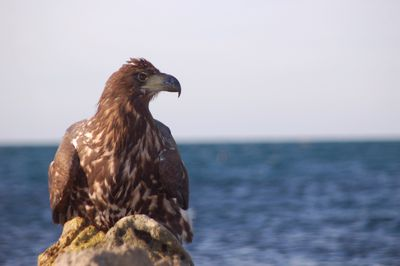

In [16]:
img = Image.open('eagle.jpg')
img

# Preparing Image Data 

Stacking pixels

In [49]:
img = img.convert('RGB') # To make the image has been read in the RGB space 
width, height = img.size # Keep track of the initial dimensions
img_array = np.array(img) # to numpy array
img_stack = img_array.reshape(-1,3) # stacks pixels

# KMeans

## Test Data

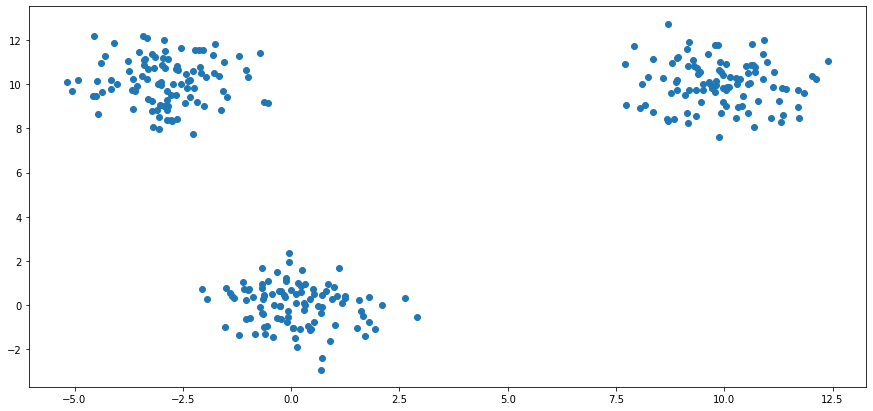

In [14]:
mean1 = [0, 0]
mean2 = [10, 10]
mean3 = [-3, 10]
cov = [[1,0], [0,1]]
x1 = np.random.multivariate_normal(mean1, cov, 100)
x2 = np.random.multivariate_normal(mean2, cov, 100)
x3 = np.random.multivariate_normal(mean3, cov, 100)
x = np.concatenate([x1,x2,x3])

plt.scatter(x[:,0], x[:,1])

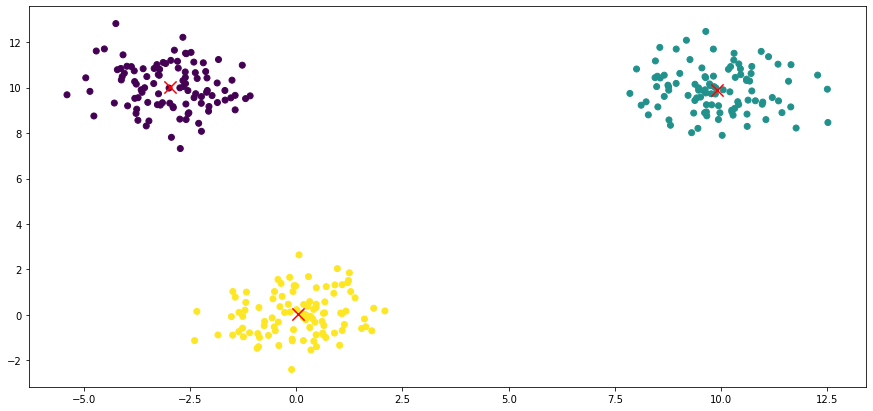

In [13]:
model = KMeans(n_clusters=3).fit(x)
labels = model.labels_
centers = model.cluster_centers_
plt.scatter(x[:,0], x[:,1], c = labels)
plt.scatter(centers[:,0], centers[:,1], color = 'red', marker='x', s = 150)

## Image data

### Deciding on the number of clusters

Nc = range(2, 10)
img_kmeans = [KMeans(n_clusters=i).fit(img_stack).score(img_stack) for i in Nc]

plt.plot(Nc,img_kmeans)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### Re-running the algorithm using the selected number of clusters 

In [26]:
img_model = KMeans(n_clusters=5)
img_model.fit(img_stack)
labels = img_model.labels_
centers = img_model.cluster_centers_

# Reconstructing Image

In [57]:
def map_color(img_stack, labels):
    """
    Calculates the mean color of all pixels in the same cluster and assigns the pixels to their cluster's color.
    """
    mean_colors = {}
    all_clusters = np.unique(labels)
    for c in all_clusters:
        mean_colors[c]  = np.mean(img_stack[labels==c], axis=0)
    return np.array([mean_colors[c] for c in labels])
    #return mean_colors

def reconstruct_image(img_stack, labels, width, height):
    clustered_img_stack = map_color(img_stack, labels)
    # Recovering the spacial structure of the image
    clustered_img = clustered_img_stack.reshape(height, width, 3)
    return Image.fromarray(np.uint8(clustered_img), mode='RGB')

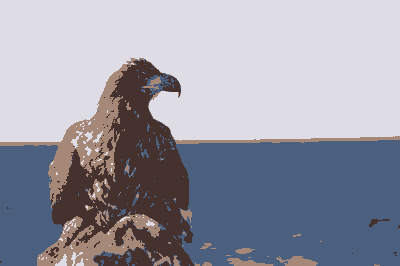

In [61]:
reconstruct_image(img_stack, labels, width, height)

# Color Quantization

Another application of clustering on image data is to perform color quantization. This helps us compress image data by selecting a number of colors to be kept in the image. By reducing the total number of colors in an image, it's possible to compress it more inteligently, which reduces storage space.

To do that, we need to set the number of clusters of the KMeans algorithm as the number of colors we'd like to keep in the image. 

In [35]:
quantization_model = KMeans(n_clusters=50)
quantization_model.fit(img_stack)
quantization_labels = quantization_model.labels_
quantization_centers = quantization_model.cluster_centers_

In [ ]:
L

In [ ]:

for c in df.predicted_clusters.unique():
    plt.hist(df[df.predicted_clusters == c].age, alpha=0.5, bins=4, ec='black')